mTSP-DS: MILP vs Matheuristic comparison

Imports:

In [1]:
from MTSP_DS_MILP_Solver import MTSP_DS_MILP_Solver
from MTSP_DS_Matheuristic_Solver import MTSP_DS_Matheuristic_Solver
from TourUtils import plotTours
from core.Location import rand_location
import time
from threading import Thread

Parameters:
n: number of customer
m: number of drone stations
Dn: number of drones for each drone station
Kn: number of trucks

In [2]:
n = 12
m = 2 
Dn = 2
Kn = 2

time_limit = 500

# Number of trials
num_trials = 5

Random setups:

In [3]:
def randomLocations(num_of_locations):
    locs = []
    for _ in range(num_of_locations):
        locs.append(rand_location())
    print(locs)
    return locs

In [4]:
setups = []
for _ in range(num_trials):
    setups.append(randomLocations(n+m))
print(setups)

[(58,87), (44,112), (130,44), (136,40), (147,79), (114,59), (124,121), (76,126), (58,51), (70,69), (39,45), (31,57), (75,117), (108,73)]
[(36,65), (113,38), (67,45), (26,40), (25,110), (100,10), (37,84), (15,86), (118,22), (58,30), (16,128), (56,26), (136,135), (85,57)]
[(144,63), (82,19), (121,8), (65,30), (70,130), (4,50), (59,148), (147,59), (47,147), (69,95), (115,110), (60,144), (42,12), (49,66)]
[(31,49), (148,125), (57,4), (90,110), (95,54), (24,20), (82,97), (85,2), (12,118), (116,16), (75,115), (93,129), (14,95), (72,39)]
[(97,129), (18,4), (48,123), (33,70), (117,141), (10,22), (70,28), (40,99), (65,21), (117,111), (143,49), (3,137), (111,49), (115,11)]
[[(58,87), (44,112), (130,44), (136,40), (147,79), (114,59), (124,121), (76,126), (58,51), (70,69), (39,45), (31,57), (75,117), (108,73)], [(36,65), (113,38), (67,45), (26,40), (25,110), (100,10), (37,84), (15,86), (118,22), (58,30), (16,128), (56,26), (136,135), (85,57)], [(144,63), (82,19), (121,8), (65,30), (70,130), (4,50)

Compare success methods:

In [5]:
def run_algorithm(algorithm, result_dict, key, locations):
    try:
        if algorithm == "MILP":
            milp_solver = MTSP_DS_MILP_Solver(n,m,Kn,Dn, custom_locations=locations)
            milp_solver.solve()
            result_dict[key] = {'success': True, 'message': f"sol: {milp_solver.getSolution()}"}
        else:
            solver = MTSP_DS_Matheuristic_Solver(n,m,Kn,Dn, custom_locations=locations)
            solver.solve()
            result_dict[key] = {'success': True, 'message': f"sol: {solver.getTau()}"}
    except Exception as e:
        result_dict[key] = {'success': False, 'message': str(e)}

In [6]:
def run_with_timeout(algorithm, execution_time_limit, locs):
    result_dict = {}
    thread = Thread(target=run_algorithm, args=(algorithm, result_dict, 'result', locs))
    thread.start()
    thread.join(timeout=execution_time_limit)
    if thread.is_alive():
        return {'success': False, 'message': 'Timeout exceeded'}
    else:
        return result_dict['result']

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-05
MILP Result: {'success': True, 'message': 'sol: 277.9980303693251'}


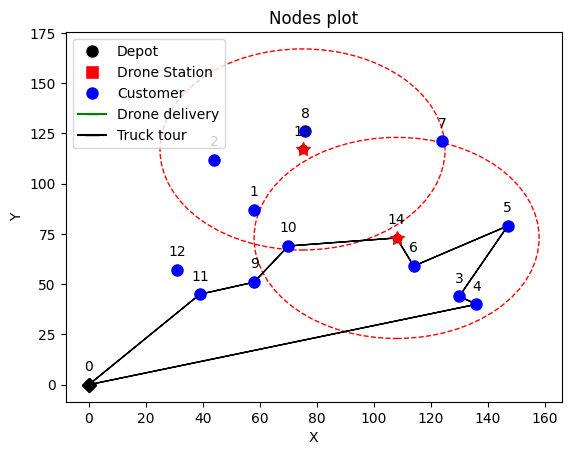

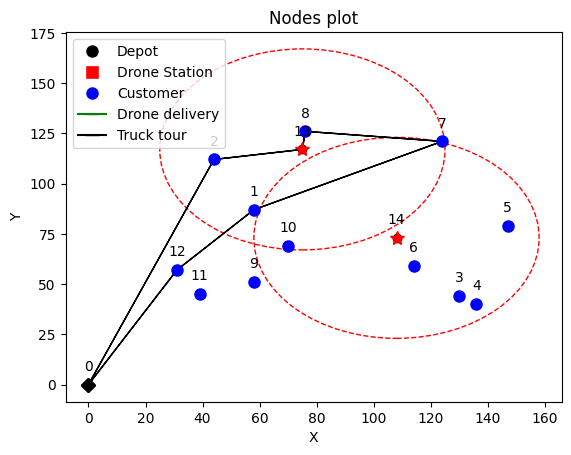

d_station: 13, in d_station_combo: (13, 14)
Entro in local_DASP d: 13 
 con sol: {'tours': [[Depot 0, Customer 11, Customer 9, Customer 10, DroneStation 14, Customer 6, Customer 5, Customer 3, Customer 4, Depot 15], [Depot 0, Customer 2, DroneStation 13, Customer 8, Customer 7, Customer 1, Customer 12, Depot 15]], 'assigned_customers': [], 'value': []}


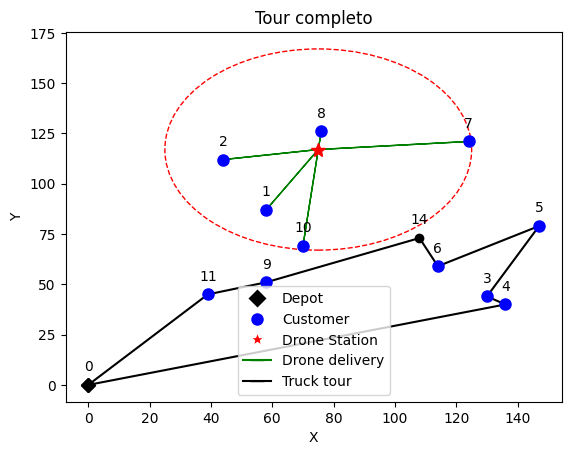

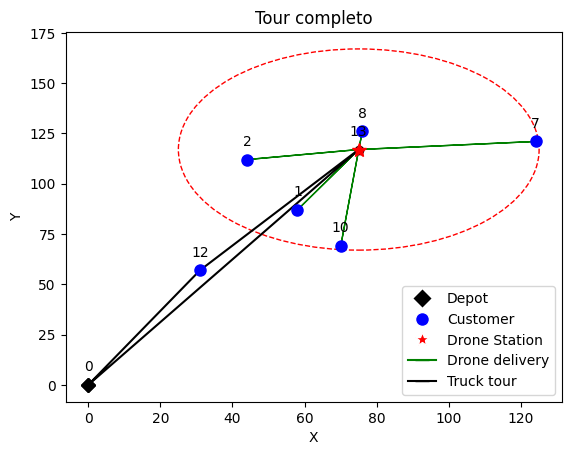

d_station: 14, in d_station_combo: (13, 14)
Entro in local_DASP d: 14 
 con sol: {'tours': [[Depot 0, Customer 11, Customer 9, DroneStation 14, Customer 6, Customer 5, Customer 3, Customer 4, Depot 15], [Depot 0, DroneStation 13, Customer 12, Depot 15]], 'assigned_customers': [Customer 10, Customer 7, Customer 2, Customer 8, Customer 1], 'value': 375.7998853198468}


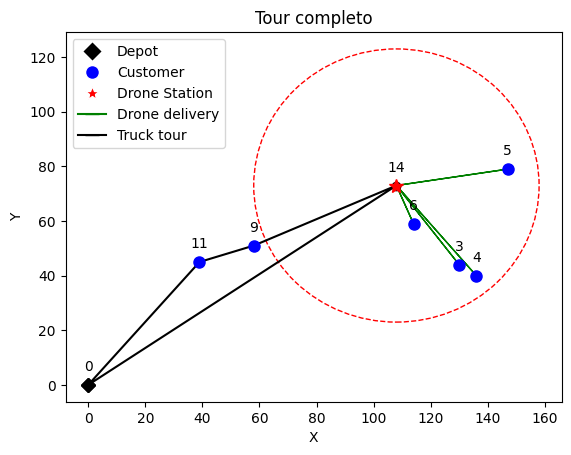

Best sol:  {'tours': [[Depot 0, DroneStation 13, Customer 12, Depot 15], [Depot 0, Customer 11, Customer 9, DroneStation 14, Depot 15]], 'assigned_customers': [Customer 10, Customer 7, Customer 2, Customer 8, Customer 1, Customer 5, Customer 3, Customer 6, Customer 4], 'value': 264.4563612695447}
exec time: 298.0616068840027
Matheuristic Result: {'success': True, 'message': "sol: {'tours': [[Depot 0, DroneStation 13, Customer 12, Depot 15], [Depot 0, Customer 11, Customer 9, DroneStation 14, Depot 15]], 'assigned_customers': [Customer 10, Customer 7, Customer 2, Customer 8, Customer 1, Customer 5, Customer 3, Customer 6, Customer 4], 'value': 264.4563612695447}"}
MILP Result: {'success': True, 'message': 'sol: 262.2399956443926'}


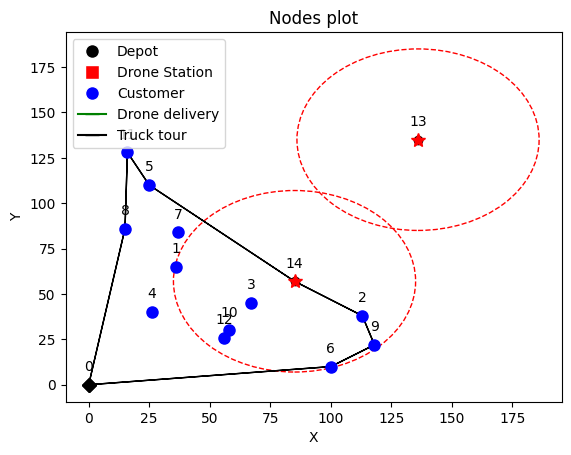

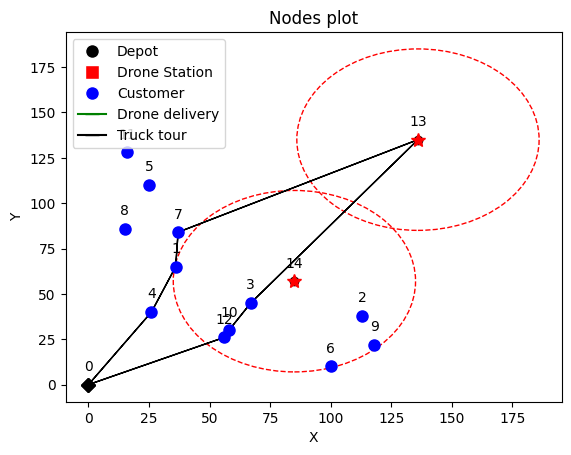

d_station: 13, in d_station_combo: (13, 14)
Entro in local_DASP d: 13 
 con sol: {'tours': [[Depot 0, Customer 8, Customer 11, Customer 5, DroneStation 14, Customer 2, Customer 9, Customer 6, Depot 15], [Depot 0, Customer 12, Customer 10, Customer 3, DroneStation 13, Customer 7, Customer 1, Customer 4, Depot 15]], 'assigned_customers': [], 'value': []}


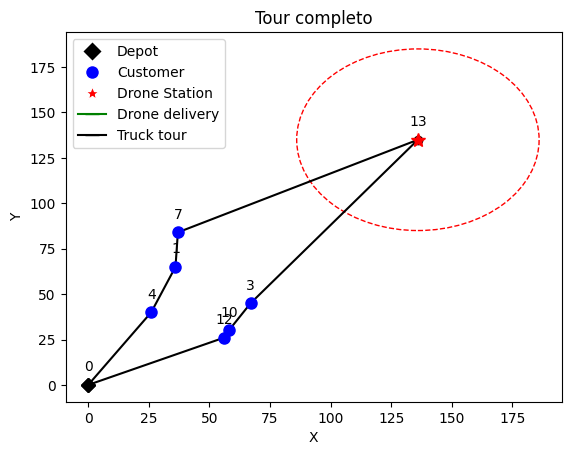

d_station: 14, in d_station_combo: (13, 14)
Entro in local_DASP d: 14 
 con sol: {'tours': [[Depot 0, Customer 8, Customer 11, Customer 5, DroneStation 14, Customer 2, Customer 9, Customer 6, Depot 15], [Depot 0, Customer 12, Customer 10, Customer 3, DroneStation 13, Customer 7, Customer 1, Customer 4, Depot 15]], 'assigned_customers': [], 'value': 402.1365673831252}


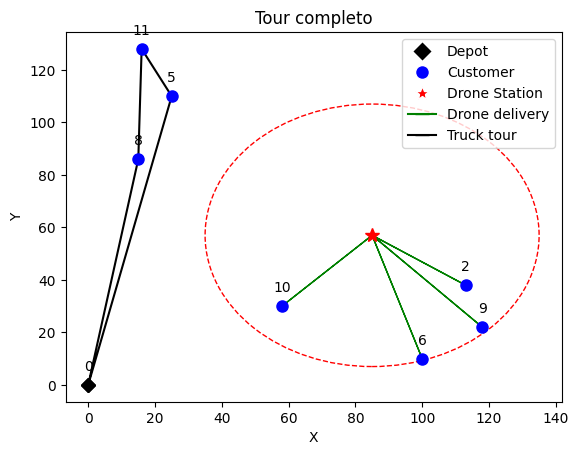

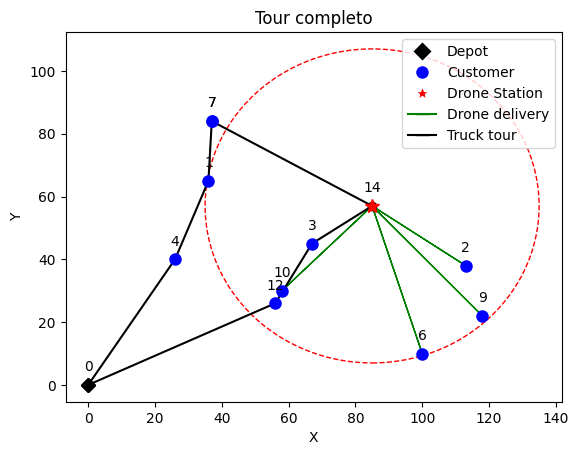

Best sol:  {'tours': [[Depot 0, Customer 8, Customer 11, Customer 5, Depot 15], [Depot 0, Customer 12, Customer 3, DroneStation 14, Customer 7, Customer 7, Customer 1, Customer 4, Depot 15]], 'assigned_customers': [Customer 2, Customer 6, Customer 9, Customer 10], 'value': 262.2399956443931}
exec time: 105.91320133209229
Matheuristic Result: {'success': True, 'message': "sol: {'tours': [[Depot 0, Customer 8, Customer 11, Customer 5, Depot 15], [Depot 0, Customer 12, Customer 3, DroneStation 14, Customer 7, Customer 7, Customer 1, Customer 4, Depot 15]], 'assigned_customers': [Customer 2, Customer 6, Customer 9, Customer 10], 'value': 262.2399956443931}"}
MILP Result: {'success': True, 'message': 'sol: 396.08275789019217'}


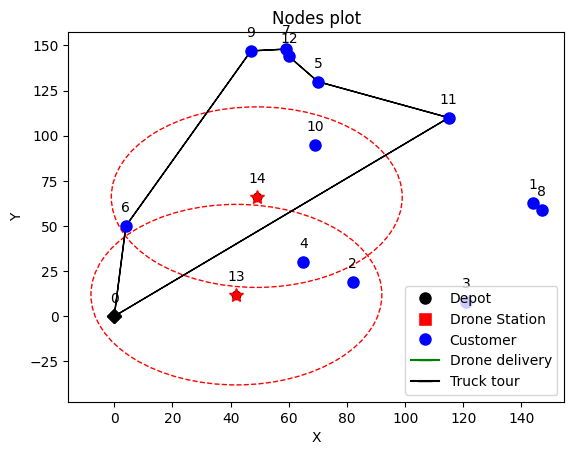

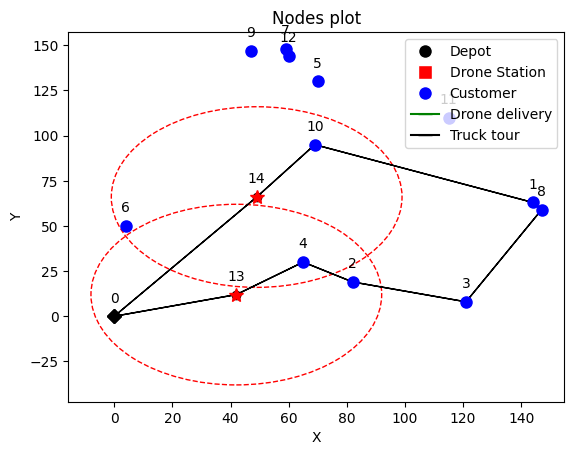

d_station: 13, in d_station_combo: (13, 14)
Entro in local_DASP d: 13 
 con sol: {'tours': [[Depot 0, Customer 6, Customer 9, Customer 7, Customer 12, Customer 5, Customer 11, Depot 15], [Depot 0, DroneStation 13, Customer 4, Customer 2, Customer 3, Customer 8, Customer 1, Customer 10, DroneStation 14, Depot 15]], 'assigned_customers': [], 'value': []}


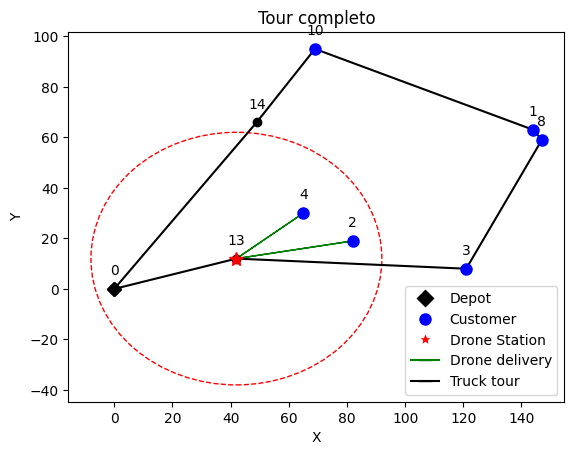

d_station: 14, in d_station_combo: (13, 14)
Entro in local_DASP d: 14 
 con sol: {'tours': [[Depot 0, Customer 6, Customer 9, Customer 7, Customer 12, Customer 5, Customer 11, Depot 15], [Depot 0, DroneStation 13, Customer 3, Customer 8, Customer 1, Customer 10, DroneStation 14, Depot 15]], 'assigned_customers': [Customer 2, Customer 4], 'value': 383.9971511363983}


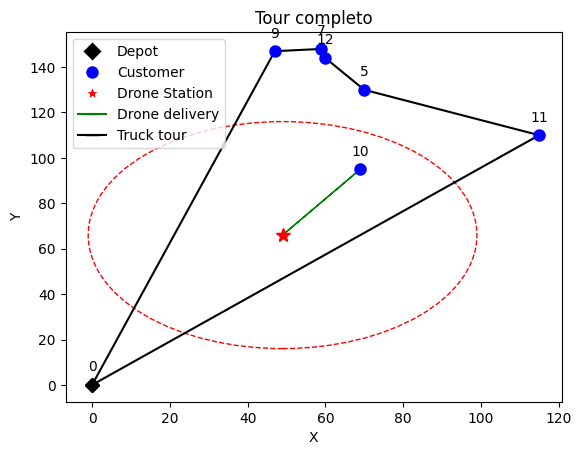

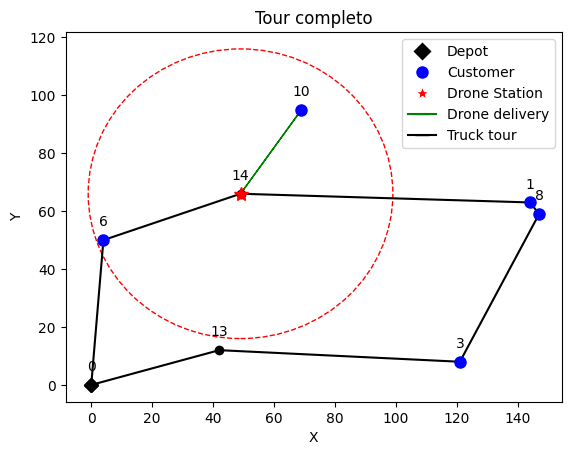

Best sol:  {'tours': [[Depot 0, Customer 9, Customer 7, Customer 12, Customer 5, Customer 11, Depot 15], [Depot 0, DroneStation 13, Customer 3, Customer 8, Customer 1, DroneStation 14, Customer 6, Depot 15]], 'assigned_customers': [Customer 2, Customer 4, Customer 10], 'value': 396.082757890219}
exec time: 191.07512998580933
Matheuristic Result: {'success': True, 'message': "sol: {'tours': [[Depot 0, Customer 9, Customer 7, Customer 12, Customer 5, Customer 11, Depot 15], [Depot 0, DroneStation 13, Customer 3, Customer 8, Customer 1, DroneStation 14, Customer 6, Depot 15]], 'assigned_customers': [Customer 2, Customer 4, Customer 10], 'value': 396.082757890219}"}
MILP Result: {'success': True, 'message': 'sol: 387.4480609964377'}


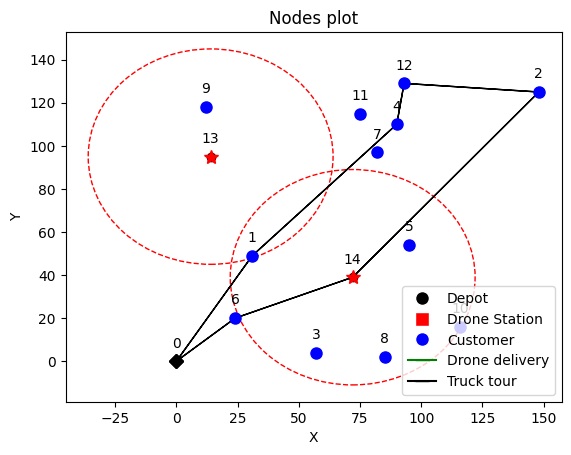

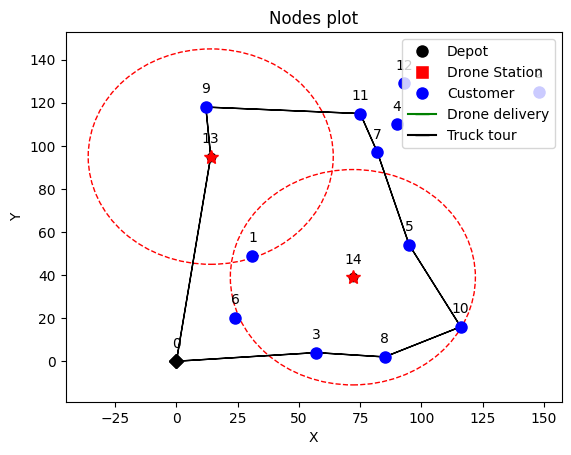

d_station: 13, in d_station_combo: (13, 14)
Entro in local_DASP d: 13 
 con sol: {'tours': [[Depot 0, Customer 6, DroneStation 14, Customer 2, Customer 12, Customer 4, Customer 1, Depot 15], [Depot 0, Customer 3, Customer 8, Customer 10, Customer 5, Customer 7, Customer 11, Customer 9, DroneStation 13, Depot 15]], 'assigned_customers': [], 'value': []}


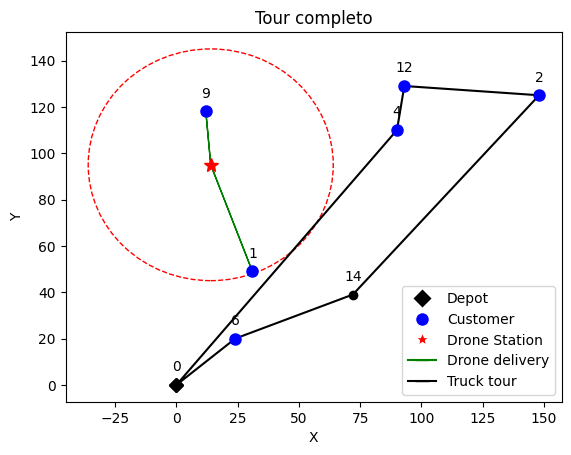

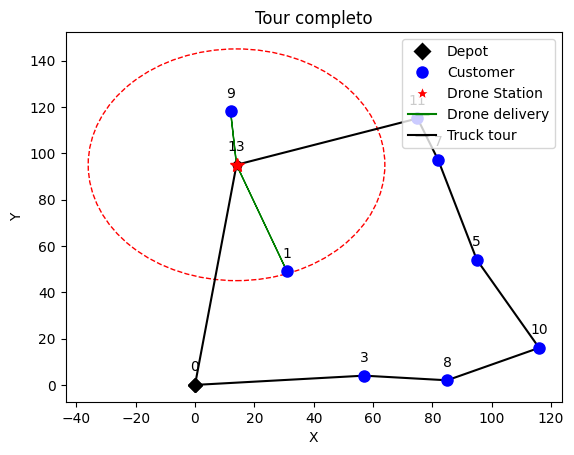

d_station: 14, in d_station_combo: (13, 14)
Entro in local_DASP d: 14 
 con sol: {'tours': [[Depot 0, Customer 6, DroneStation 14, Customer 2, Customer 12, Customer 4, Depot 15], [Depot 0, Customer 3, Customer 8, Customer 10, Customer 5, Customer 7, Customer 11, DroneStation 13, Depot 15]], 'assigned_customers': [Customer 1, Customer 9], 'value': 414.1413213964564}


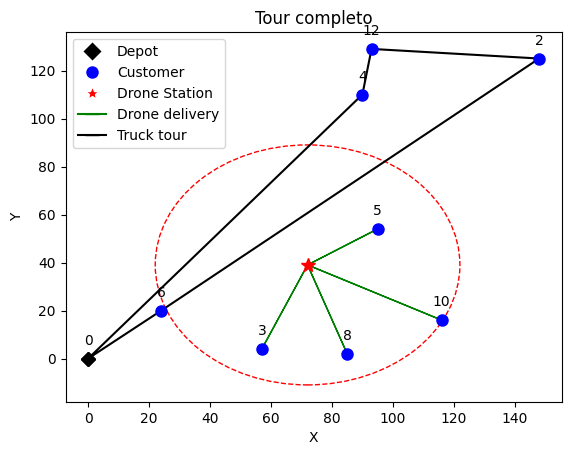

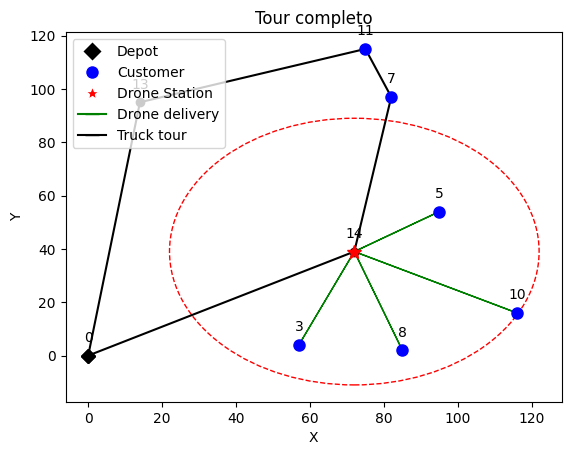

Best sol:  {'tours': [[Depot 0, Customer 6, Customer 2, Customer 12, Customer 4, Depot 15], [Depot 0, DroneStation 14, Customer 7, Customer 11, DroneStation 13, Depot 15]], 'assigned_customers': [Customer 1, Customer 9, Customer 5, Customer 3, Customer 8, Customer 10], 'value': 410.2321949005127}
exec time: 229.81773972511292
Matheuristic Result: {'success': True, 'message': "sol: {'tours': [[Depot 0, Customer 6, Customer 2, Customer 12, Customer 4, Depot 15], [Depot 0, DroneStation 14, Customer 7, Customer 11, DroneStation 13, Depot 15]], 'assigned_customers': [Customer 1, Customer 9, Customer 5, Customer 3, Customer 8, Customer 10], 'value': 410.2321949005127}"}
MILP Result: {'success': True, 'message': 'sol: 398.3478265455191'}
Matheuristic Result: {'success': False, 'message': 'Timeout exceeded'}
MILP Success Count: 5
Matheuristic Success Count: 4
MILP total: [True, True, True, True, True]
Matheuristic total: [True, True, True, True, False]

 error:  ['Timeout exceeded']
MILP algor

In [7]:
milp_success_count = 0
matheuristic_success_count = 0
math_total = []
milp_total = []
error = []

for i in range(num_trials):
    # Run MILP algorithm with timeout
    milp_result = run_with_timeout("MILP", time_limit, setups[i])
    milp_total.append(milp_result['success'])
    if milp_result['success']:
        milp_success_count += 1
    print('MILP Result:', milp_result)

    # Run Matheuristic algorithm with timeout
    matheuristic_result = run_with_timeout("MATHEURISTIC", time_limit, setups[i])
    math_total.append(matheuristic_result['success'])
    if matheuristic_result['success']:
        matheuristic_success_count += 1
    else:
        error.append(matheuristic_result['message'])
    print('Matheuristic Result:', matheuristic_result)

# Compare results
print('MILP Success Count:', milp_success_count)
print('Matheuristic Success Count:', matheuristic_success_count)
print('MILP total:', milp_total)
print('Matheuristic total:', math_total)
print("\n error: ", error)

if milp_success_count > matheuristic_success_count:
    print('MILP algorithm had more successes.')
elif matheuristic_success_count > milp_success_count:
    print('Matheuristic algorithm had more successes.')
else:
    print('Both algorithms had the same number of successes.')